# 📌 파이썬 머신러닝 완벽 가이드 - 회귀

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

## 1.회귀 소개

## 2.단순 선형 회귀를 통한 회귀 이해

### 2.1 단순 선형 회귀 그래프 그리기

In [5]:
global_font = {'family': 'AppleGothic', 'size' : 10, 'weight': 'bold'}

# 폰트 설정
mpl.rc('font', **global_font)

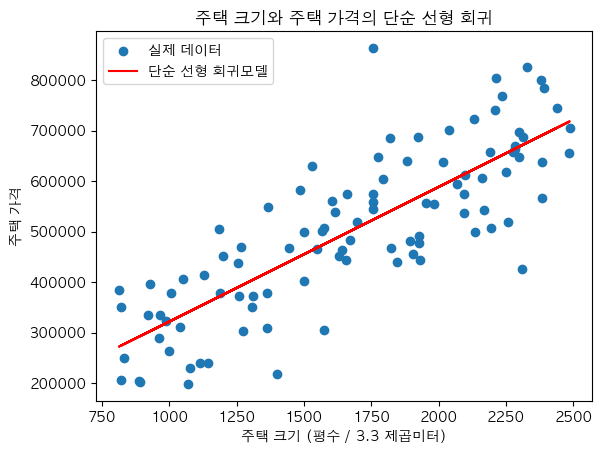

In [7]:
# 주택 크기, 주택 가격 변수 생성
np.random.seed(42)  # 랜덤 시드 고정
house_size = np.random.randint(800, 2500, 100)
house_price = 300 * house_size + np.random.normal(0, 100000, 100)

# 단순 선형 회귀 모델
slope, intercept = np.polyfit(house_size, house_price, 1)
regression_line = slope * house_size + intercept

# 그래프 그리기
plt.scatter(house_size, house_price, label='실제 데이터')
plt.plot(house_size, regression_line, color='red', label='단순 선형 회귀모델')
plt.xlabel('주택 크기 (평수 / 3.3 제곱미터)')
plt.ylabel('주택 가격')
plt.legend()
plt.title('주택 크기와 주택 가격의 단순 선형 회귀')
plt.show()

## 3.비용 최소화하기 - 경사하강법(Gradient Descent) 소개

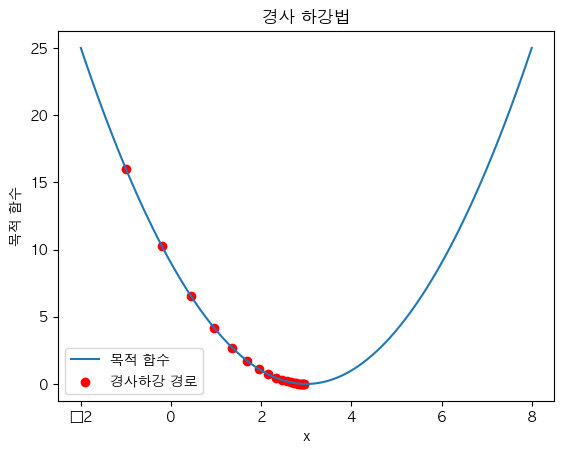

In [15]:
# 간단한 예제 함수: y = (x-3)^2 + 5
def objective_function(x):
    return (x - 3)** 2

# 함수의 도함수(gradient): y' = 2 * (x - 3)
def gradient(x):
    return 2 * (x - 3)

# 경사하강법 함수
def gradient_descent(learning_rate, initial_x, num_iterations):
    x_values = [initial_x]
    for _ in range(num_iterations):
        gradient_value = gradient(x_values[-1])
        new_x = x_values[-1] - learning_rate * gradient_value
        x_values.append(new_x)
    return x_values

# 그래프 생성
def plot_gradient_descent(learning_rate, initial_x, num_iterations):
    x_values = np.linspace(-2, 8, 100)
    y_values = objective_function(x_values)

    plt.plot(x_values, y_values, label='목적 함수')
    
    x_optimal = gradient_descent(learning_rate, initial_x, num_iterations)
    y_optimal = [objective_function(x) for x in x_optimal]

    plt.scatter(x_optimal, y_optimal, color='red', label='경사하강 경로')
    plt.title('경사 하강법')
    plt.xlabel('x')
    plt.ylabel('목적 함수')
    plt.legend()
    plt.show()

# 경사하강법 그래프 플로팅
learning_rate = 0.1
initial_x = -1
num_iterations = 20
plot_gradient_descent(learning_rate, initial_x, num_iterations)